In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('/content/tested.csv')

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
df.drop(columns=['Name'], axis=1, inplace=True)

In [53]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
df.drop(columns=['PassengerId'], axis=1, inplace=True)

In [55]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327
Embarked,0


In [57]:
df.shape

(418, 10)

In [58]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [59]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327
Embarked,0


In [60]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,0,3,male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,female,39.00000,0,0,PC 17758,108.9000,C105,C
415,0,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0,3,male,30.27259,0,0,359309,8.0500,NaN,S
417,0,3,male,30.27259,1,1,2668,22.3583,NaN,C


In [61]:
|sns.countplot(x='Survived', data=df)

SyntaxError: invalid syntax (<ipython-input-61-1f287a97de15>, line 1)

In [ ]:
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Age', ylabel='Count'>

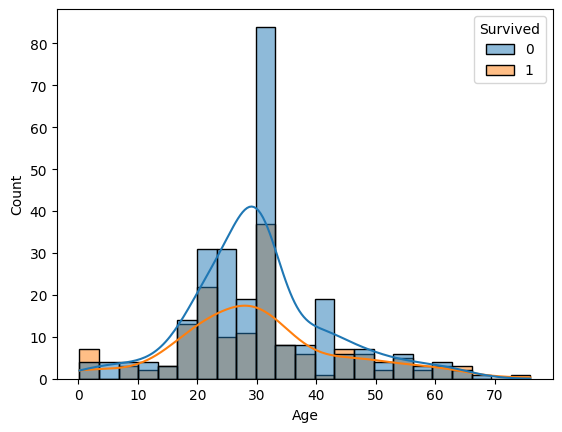

In [62]:
sns.histplot(data=df, x='Age', kde=True, hue='Survived')

<Axes: xlabel='Pclass', ylabel='Age'>

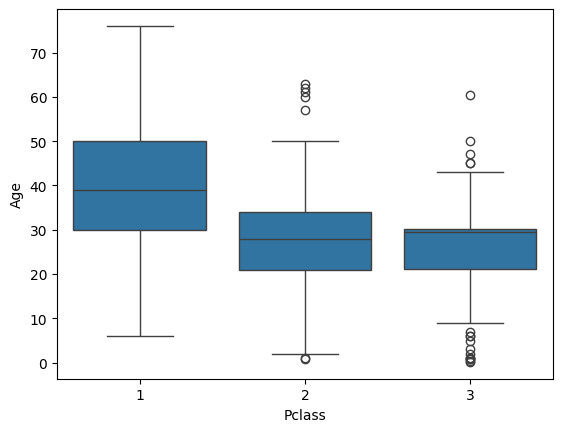

In [63]:
sns.boxplot(data=df, x='Pclass', y='Age')

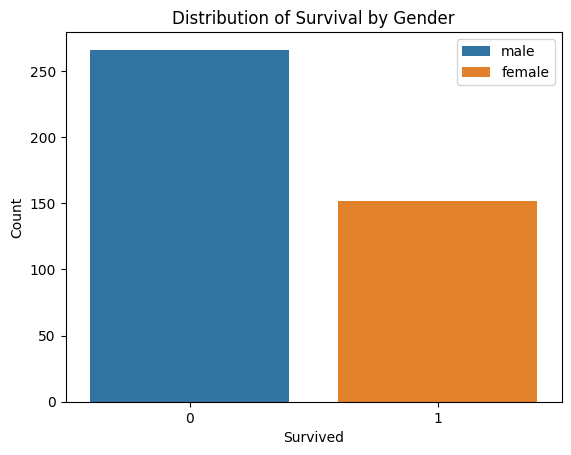

In [64]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.legend(loc='upper right')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survival by Gender')
plt.show()

In [65]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
df.drop(columns=['Cabin'], axis=1, inplace=True)

In [67]:
df.drop(columns=['Ticket'], axis=1, inplace=True)

In [68]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [69]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [70]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,Q
1,1,3,1,47.0,1,0,7.0000,S
2,0,2,0,62.0,0,0,9.6875,Q
3,0,3,0,27.0,0,0,8.6625,S
4,1,3,1,22.0,1,1,12.2875,S


In [71]:
df['Embarked'].value_counts()

,count
Embarked,
S,270
C,102
Q,46


In [72]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [73]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


In [74]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [75]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [76]:
y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [78]:
X.isnull().sum()
X['Fare'].fillna(X['Fare'].median(), inplace=True)

In [79]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [80]:
X[numeric_features].head()

,Age,SibSp,Parch,Fare
0,0.334993,-0.499470,-0.400248,-0.497413
1,1.325530,0.616992,-0.400248,-0.512278
2,2.514175,-0.499470,-0.400248,-0.464100
3,-0.259330,-0.499470,-0.400248,-0.482475
4,-0.655545,0.616992,0.619896,-0.417492


In [81]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,0.334993,-0.499470,-0.400248,-0.497413,2
1,3,1,1.325530,0.616992,-0.400248,-0.512278,0
2,2,0,2.514175,-0.499470,-0.400248,-0.464100,2
3,3,0,-0.259330,-0.499470,-0.400248,-0.482475,0
4,3,1,-0.655545,0.616992,0.619896,-0.417492,0


In [82]:
model = LogisticRegression()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [84]:
model.fit(X_train, y_train)

LogisticRegression()

In [85]:
model.score(X_train, y_train)

1.0

In [86]:
model.score(X_test, y_test)

1.0

In [87]:
model.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [88]:
model.predict_proba(X_test)

array([[0.0511563 , 0.9488437 ],
       [0.0397001 , 0.9602999 ],
       [0.97774481, 0.02225519],
       [0.05932316, 0.94067684],
       [0.96203302, 0.03796698],
       [0.96513952, 0.03486048],
       [0.96167122, 0.03832878],
       [0.02177912, 0.97822088],
       [0.05845113, 0.94154887],
       [0.07259585, 0.92740415],
       [0.94649303, 0.05350697],
       [0.97256274, 0.02743726],
       [0.05116055, 0.94883945],
       [0.96333471, 0.03666529],
       [0.91331599, 0.08668401],
       [0.96910994, 0.03089006],
       [0.97744898, 0.02255102],
       [0.0774137 , 0.9225863 ],
       [0.96928846, 0.03071154],
       [0.96491686, 0.03508314],
       [0.97745558, 0.02254442],
       [0.96567112, 0.03432888],
       [0.97301342, 0.02698658],
       [0.96552849, 0.03447151],
       [0.97084524, 0.02915476],
       [0.06929254, 0.93070746],
       [0.96564198, 0.03435802],
       [0.97254084, 0.02745916],
       [0.9784378 , 0.0215622 ],
       [0.96866543, 0.03133457],
       [0.